In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import mne

In [3]:
raw_data = mne.io.read_raw_edf("C:/Users/juleq/Downloads/S001R04.edf")

Extracting EDF parameters from C:\Users\juleq\Downloads\S001R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [4]:
print(raw_data)

<RawEDF | S001R04.edf, 64 x 20000 (125.0 s), ~65 kB, data not loaded>


In [5]:
eeg_data = raw_data.get_data()

In [6]:
eeg_data.shape

(64, 20000)

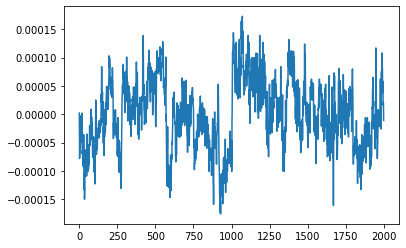

In [7]:
plt.plot(eeg_data[1][:2000])

In [8]:
from sklearn.decomposition import FastICA

In [9]:
raw = mne.io.read_raw_edf("C:/Users/juleq/Downloads/S001R04.edf", preload=True)
raw.rename_channels(lambda s: s.strip("."))

montage = mne.channels.make_standard_montage("standard_1020")
raw.set_montage(montage, match_case=False)

# get channel names
channels = raw.info.ch_names

# get the data in shape (samples, channels)
eeg = raw.get_data().T

# construct and save Pandas DataFrame as .csv
df = pd.DataFrame(eeg, columns=channels)
df.to_csv('eeg.csv', index=False)

Extracting EDF parameters from C:\Users\juleq\Downloads\S001R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...


In [10]:
eeg = pd.read_csv('eeg.csv')
eeg *= 10**6

In [11]:
eeg.shape

(20000, 64)

4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.
Creating RawArray with float64 data, n_channels=90, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


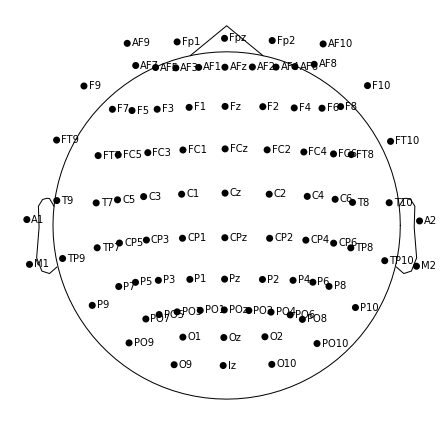

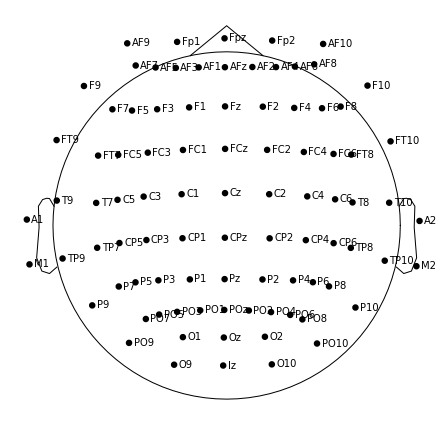

In [154]:
montage.plot()

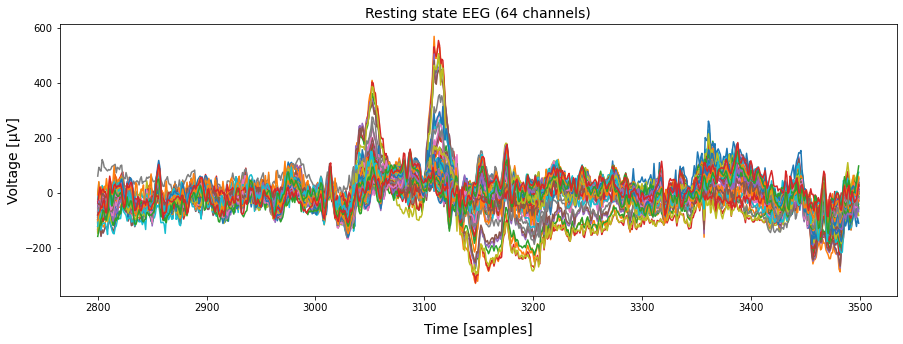

In [206]:
eeg.iloc[2800:3500].plot(figsize=(15,5), legend=False)
plt.xlabel('Time [samples]', fontsize=14, labelpad=10)
plt.ylabel('Voltage [\u03BCV]', fontsize=14)
plt.title('Resting state EEG (64 channels)', fontsize=14)
#plt.savefig('eeg_all.png')
plt.show()

<AxesSubplot:>

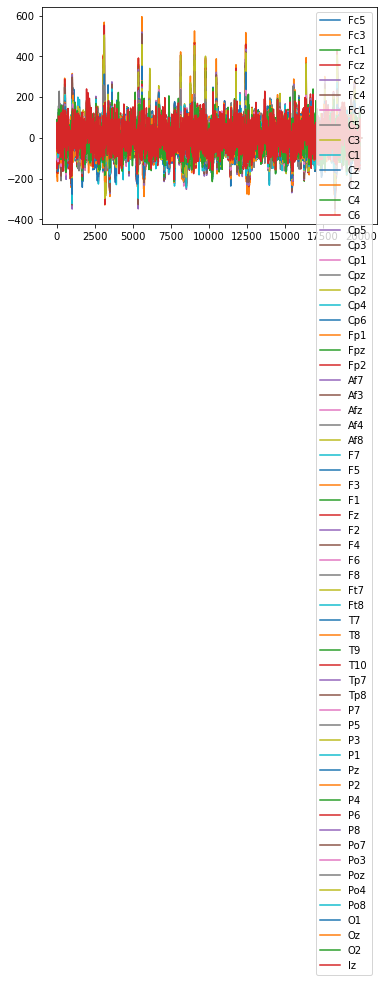

In [156]:
eeg.plot()

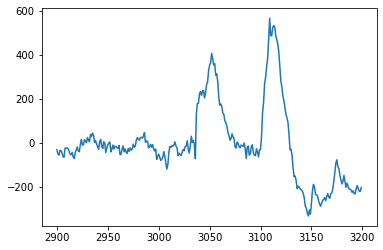

In [204]:
plt.plot(eeg['Fp1'][2900:3200])

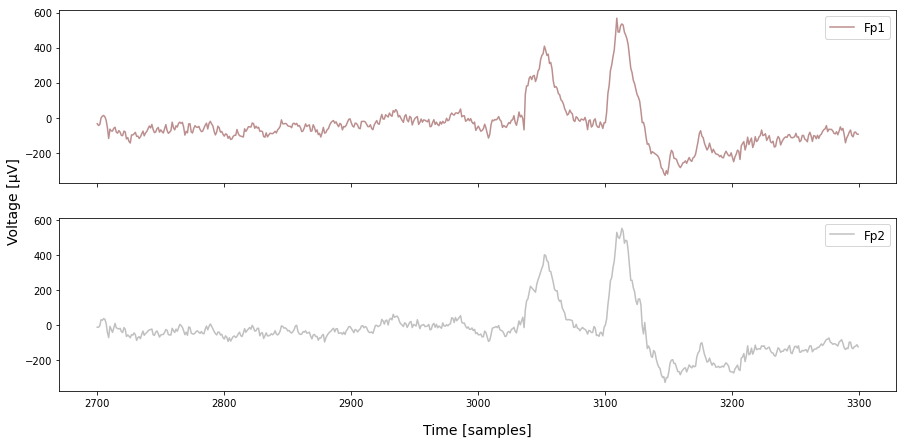

In [214]:
fig, axs = plt.subplots(2,1, figsize=(15, 7), sharex=True, sharey=True)
axs = axs.ravel()
plt.margins(x=0.001)
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
axs[0].plot(eeg['Fp1'].iloc[2700:3300], label='Fp1', color='rosybrown')
axs[0].legend(loc="upper right", fontsize=12)
axs[1].plot(eeg['Fp2'].iloc[2700:3300], label='Fp2', color='silver')
axs[1].legend(loc="upper right", fontsize=12)
plt.xlabel('Time [samples]', fontsize=14, labelpad=15)
plt.ylabel('Voltage [\u03BCV]', fontsize=14, labelpad=15)
#plt.savefig('fp1_fp2.png')
plt.show()

In [208]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components=64, random_state=0, tol=0.05)
comps = ica.fit_transform(eeg)

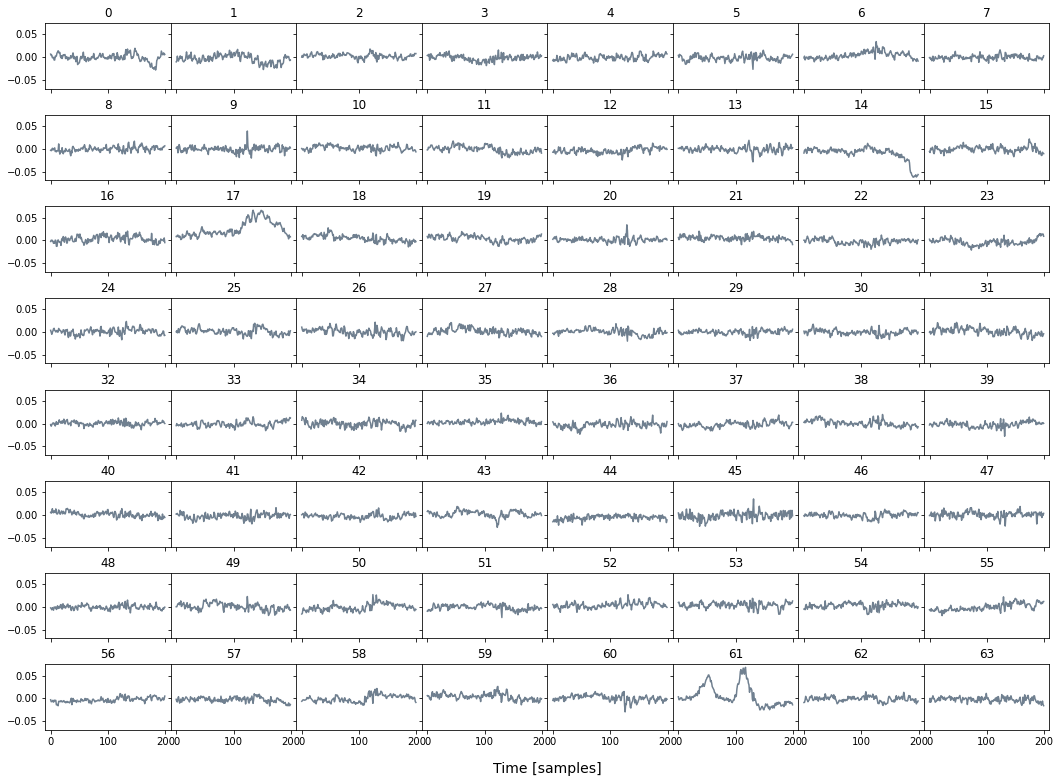

In [209]:
fig, axs = plt.subplots(8,8, figsize=(18, 13), sharex=True, sharey=True)
fig.subplots_adjust(hspace = .4, wspace=0)
axs = axs.ravel()

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel('Time [samples]', fontsize=14, labelpad=15)

for i in range(64):
    axs[i].plot(comps[3000:3200, i], color='slategrey')
    axs[i].set_title(str(i))
    

In [210]:
comps_restored = comps.copy()
comps_restored[:,[14, 25, 61]] = 0 # set artefact components to zero
restored = ica.inverse_transform(comps_restored)

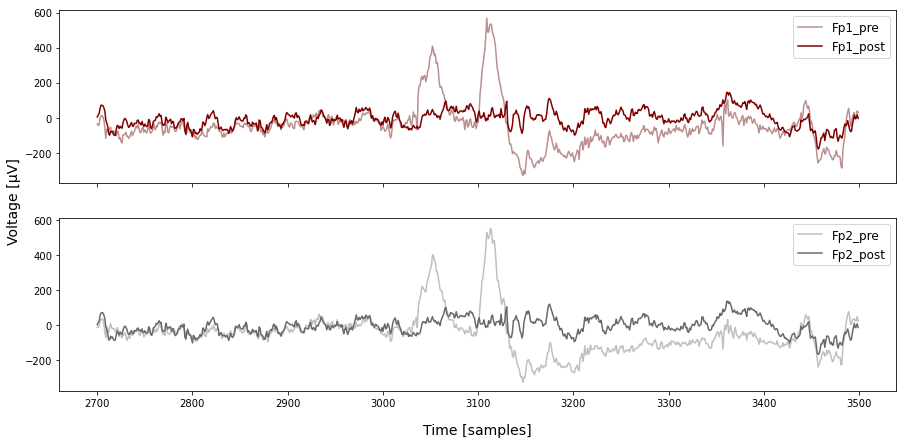

In [217]:
fig, axs = plt.subplots(2,1, figsize=(15, 7), sharex=True, sharey=True)
axs = axs.ravel()
plt.margins(x=0.001)
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
axs[0].plot(eeg['Fp1'].iloc[2700:3500], label='Fp1_pre', color='rosybrown')
axs[0].plot(np.arange(2700,3500), restored[2700:3500, 34], label='Fp1_post', color='maroon')
axs[0].legend(loc="upper right", fontsize=12)
axs[1].plot(eeg['Fp2'].iloc[2700:3500], label='Fp2_pre', color='silver')
axs[1].plot(np.arange(2700,3500), restored[2700:3500, 35], label='Fp2_post', color='dimgray')
axs[1].legend(loc="upper right", fontsize=12)
plt.xlabel('Time [samples]', fontsize=14, labelpad=15)
plt.ylabel('Voltage [\u03BCV]', fontsize=14, labelpad=15)
#plt.savefig('post_ica.png')
plt.show()

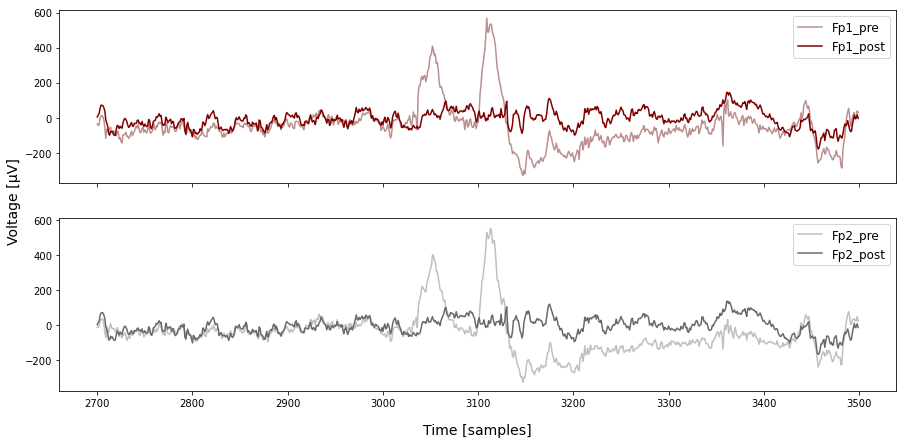

In [219]:
fig, axs = plt.subplots(2,1, figsize=(15, 7), sharex=True, sharey=True)
axs = axs.ravel()
plt.margins(x=0.001)
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
axs[0].plot(eeg['Fp1'].iloc[2700:3500], label='Fp1_pre', color='rosybrown')
axs[0].plot(np.arange(2700,3500), restored[2700:3500, 34], label='Fp1_post', color='maroon')
axs[0].legend(loc="upper right", fontsize=12)
axs[1].plot(eeg['Fp2'].iloc[2700:3500], label='Fp2_pre', color='silver')
axs[1].plot(np.arange(2700,3500), restored[2700:3500, 35], label='Fp2_post', color='dimgray')
axs[1].legend(loc="upper right", fontsize=12)
plt.xlabel('Time [samples]', fontsize=14, labelpad=15)
plt.ylabel('Voltage [\u03BCV]', fontsize=14, labelpad=15)
#plt.savefig('post_ica.png')
plt.show()